In [19]:
# Python 3 environment 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
from IPython.display import Image
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.preprocessing import MinMaxScaler

# Input data files are available in the "../data/" directory

import os
import graphviz
print(os.listdir("../polymer_research/data"))

# Do the following command line if Graphviz does not work
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import zipfile

# Any results you write to the current directory are saved as output.

['pp-data1.zip']


In [2]:
# Unzip the data
train_csv = zipfile.ZipFile('C:/Users/Laura/DS Projects/polymer_research/data/pp-data1.zip') 
# Read the data 
data = pd.read_csv(train_csv.open('pp_data5_train.csv'))
test_data = pd.read_csv(train_csv.open('pp_data5_test.csv'))

In [3]:
# Summary of data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12254 entries, 0 to 12253
Data columns (total 15 columns):
sim_id                      12254 non-null int64
n_temperature               12254 non-null float64
n_pressure                  12254 non-null float64
box_size                    12254 non-null float64
particle_type               12254 non-null int64
particle_shape              12254 non-null int64
particle_size               12254 non-null float64
particle_number             12254 non-null int64
polymer_type                12254 non-null int64
polymer_density             12254 non-null float64
polymer_length              12254 non-null float64
poly_part_interaction       12254 non-null float64
poly_poly_interaction       12254 non-null float64
polymer_grafting_density    12254 non-null float64
cluster                     12254 non-null int64
dtypes: float64(9), int64(6)
memory usage: 1.4 MB


In [4]:
data.describe()

,sim_id,n_temperature,n_pressure,box_size,particle_type,particle_shape,particle_size,particle_number,polymer_type,polymer_density,polymer_length,poly_part_interaction,poly_poly_interaction,polymer_grafting_density,cluster
count,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000,12254.000000
mean,11373.500000,1.000801,0.901376,101298.264215,1.380692,2.219847,8.448335,55.184838,2.989636,0.825072,43.730276,-0.023743,-0.050331,0.325741,2.005386
std,3537.569434,0.118048,0.019136,27051.765204,0.497367,0.785267,1.810216,26.091838,0.130191,0.041234,9.865577,0.170815,0.187716,0.143987,0.815645
min,5247.000000,0.800000,0.800000,50000.000000,1.000000,1.000000,5.000000,10.000000,2.000000,0.750000,0.000000,-1.000000,-0.982227,0.000000,1.000000
25%,8310.250000,0.900000,0.892080,77661.880160,1.000000,2.000000,7.011470,33.000000,3.000000,0.789214,38.756507,-0.103809,-0.148107,0.229930,1.000000
50%,11373.500000,1.000000,0.901370,101240.987150,1.000000,2.000000,8.412854,56.000000,3.000000,0.824990,44.125546,-0.023190,-0.044385,0.325202,2.000000
75%,14436.750000,1.100000,0.910767,124683.194767,2.000000,3.000000,9.736007,77.000000,3.000000,0.860501,49.259644,0.053129,0.057341,0.441358,3.000000
max,17500.000000,1.200000,1.000000,150000.000000,4.000000,3.000000,14.964950,100.000000,4.000000,0.900000,100.000000,1.000000,1.000000,0.600000,3.000000


In [5]:
data.corr()

,sim_id,n_temperature,n_pressure,box_size,particle_type,particle_shape,particle_size,particle_number,polymer_type,polymer_density,polymer_length,poly_part_interaction,poly_poly_interaction,polymer_grafting_density,cluster
sim_id,1.000000,0.000736,0.002918,-0.001344,-0.009562,-0.001165,0.000127,0.003717,-0.001640,0.007130,-0.002366,-0.018769,-0.000745,0.012547,0.012366
n_temperature,0.000736,1.000000,0.278683,0.016958,-0.000548,0.014979,0.007605,0.001470,0.016630,0.006960,-0.009866,0.004096,-0.009856,0.013212,-0.001511
n_pressure,0.002918,0.278683,1.000000,0.004536,0.005342,0.001968,-0.003708,0.011332,0.016663,0.003174,-0.001684,0.009301,0.001059,0.004177,0.012398
box_size,-0.001344,0.016958,0.004536,1.000000,0.006329,0.003407,-0.012792,0.067420,-0.005948,0.001013,0.007332,-0.009562,0.006867,-0.003527,-0.011724
particle_type,-0.009562,-0.000548,0.005342,0.006329,1.000000,0.011998,0.005670,0.002155,0.009261,-0.004100,0.027240,0.080479,0.026109,0.077853,0.053287
particle_shape,-0.001165,0.014979,0.001968,0.003407,0.011998,1.000000,-0.008684,0.009683,0.007121,0.020847,0.011272,0.002369,0.009320,0.046117,-0.005544
particle_size,0.000127,0.007605,-0.003708,-0.012792,0.005670,-0.008684,1.000000,-0.451260,-0.007638,0.009648,-0.002380,-0.011413,-0.004096,-0.010945,-0.013264
particle_number,0.003717,0.001470,0.011332,0.067420,0.002155,0.009683,-0.451260,1.000000,0.019040,-0.007076,0.014077,-0.009590,0.016595,0.005812,0.009571
polymer_type,-0.001640,0.016630,0.016663,-0.005948,0.009261,0.007121,-0.007638,0.019040,1.000000,-0.001012,0.027994,0.020283,0.029898,0.016518,0.014360
polymer_density,0.007130,0.006960,0.003174,0.001013,-0.004100,0.020847,0.009648,-0.007076,-0.001012,1.000000,0.030264,0.021154,0.029982,0.060420,0.072654


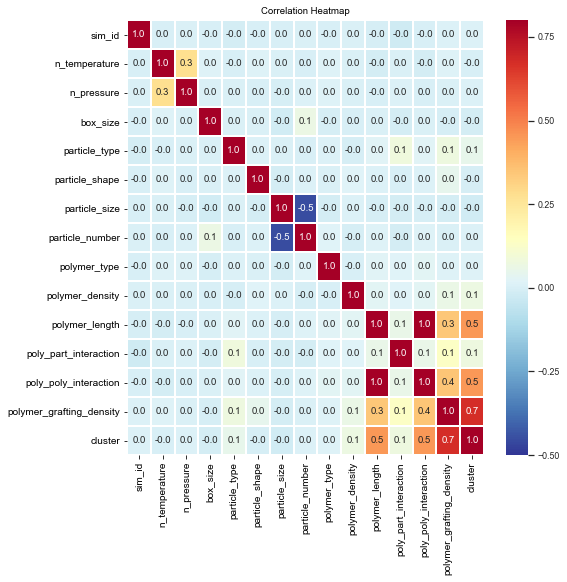

In [6]:
#correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.set(font_scale=0.8)
#sns.heatmap(data.corr(), annot=True, linewidths=.2, fmt= '.1f',ax=ax)
sns.heatmap(data.corr(), annot=True, linewidths=1, cmap = plt.cm.RdYlBu_r, vmin = -0.5, vmax = 0.8,fmt= '.1f')
plt.title('Correlation Heatmap')
plt.show()

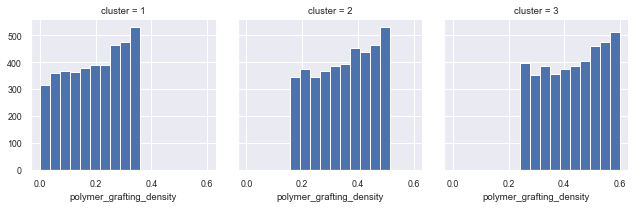

In [7]:
g = sns.FacetGrid(data, col='cluster')
g.map(plt.hist, 'polymer_grafting_density')

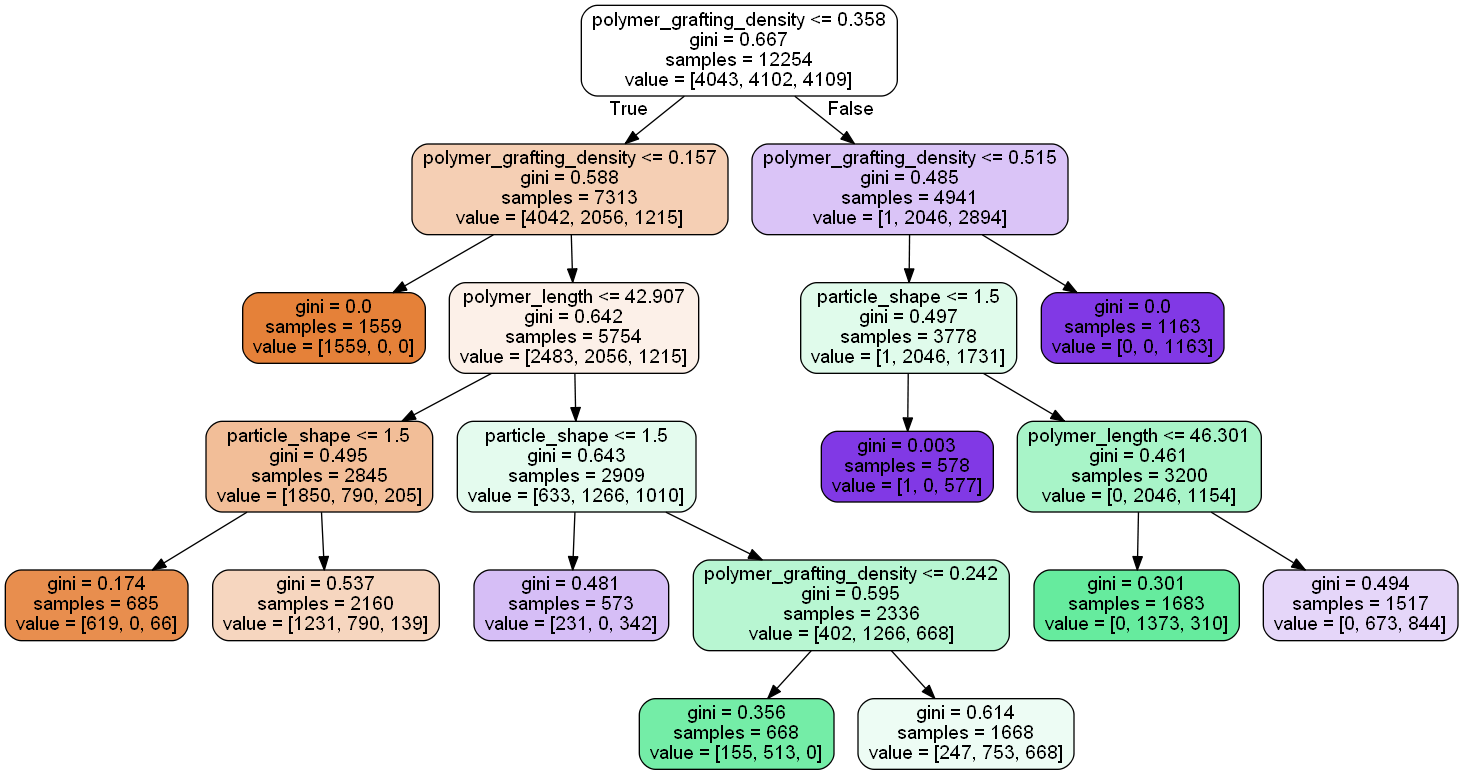

In [11]:
# this is where you design the structure of your decision tree
clf = tree.DecisionTreeClassifier(max_depth=12, min_samples_leaf=10, min_impurity_decrease=0.01)
# define what attributes you want the tree to consider
clf = clf.fit(data.iloc[:,1:14],data.iloc[:,14])
# export the tree in .dot format
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=data.columns[1:14],  
                         class_names=None,  
                         filled=True, rounded=True,  
                         special_characters=False)
# convert dot_data from .dot to .png and rename it as "tree"
graph = graphviz.Source(dot_data, format="png")
Image(graph.render("tree"))

In [12]:
# Random Forest Classification
RFclf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=5)
RFclf = RFclf.fit(data.iloc[:,1:14],data.iloc[:,14])
print(RFclf.feature_importances_)

[8.87823694e-04 2.23896037e-03 2.42332121e-03 7.64605713e-04
 1.33185008e-01 1.77874810e-03 1.38542079e-03 1.11489433e-04
 1.85953428e-02 2.02429923e-01 7.84501075e-03 1.58825642e-01
 4.69528705e-01]


A kernel density estimate plot shows the distribution of a single variable and can be thought of as a smoothed histogram (it is created by computing a kernel, usually a Gaussian, at each data point and then averaging all the individual kernels to develop a single smooth curve).

C:\Users\Laura\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


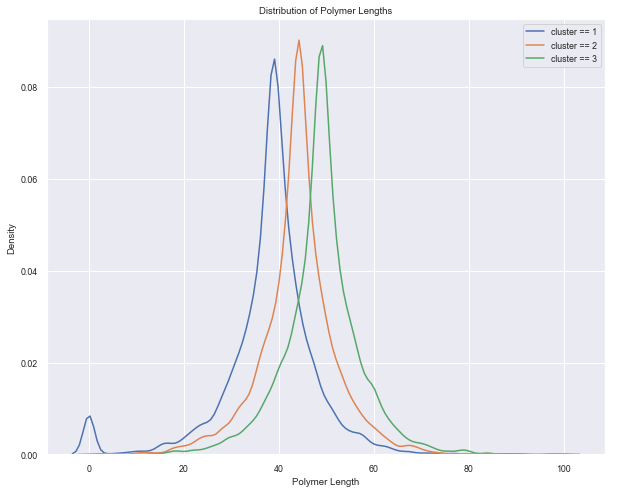

In [13]:
plt.figure(figsize = (10, 8))

# KDE plot of polymer lengths by cluster
sns.kdeplot(data.loc[data['cluster'] == 1, 'polymer_length'], label = 'cluster == 1')
sns.kdeplot(data.loc[data['cluster'] == 2, 'polymer_length'], label = 'cluster == 2')
sns.kdeplot(data.loc[data['cluster'] == 3, 'polymer_length'], label = 'cluster == 3')
# Labeling of plot
plt.xlabel('Polymer Length'); plt.ylabel('Density'); plt.title('Distribution of Polymer Lengths');

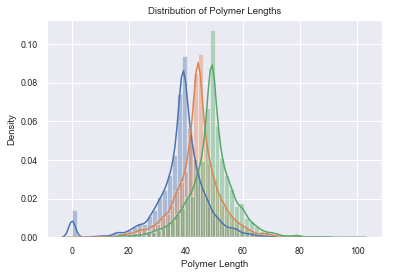

In [14]:
# distribution plot of polymer lengths by cluster (with KDE=True)
sns.distplot(data.loc[data['cluster'] == 1, 'polymer_length'], label = 'cluster == 1')
sns.distplot(data.loc[data['cluster'] == 2, 'polymer_length'], label = 'cluster == 2')
sns.distplot(data.loc[data['cluster'] == 3, 'polymer_length'], label = 'cluster == 3')
# Labeling of plot
plt.xlabel('Polymer Length'); plt.ylabel('Density'); plt.title('Distribution of Polymer Lengths');
# As the grafting_density is discrete, too many particles with grafting_density=0 are assigned
# with polymer_length=0, and thereby result in a peak there, see figure below, that KDE cannot fit.

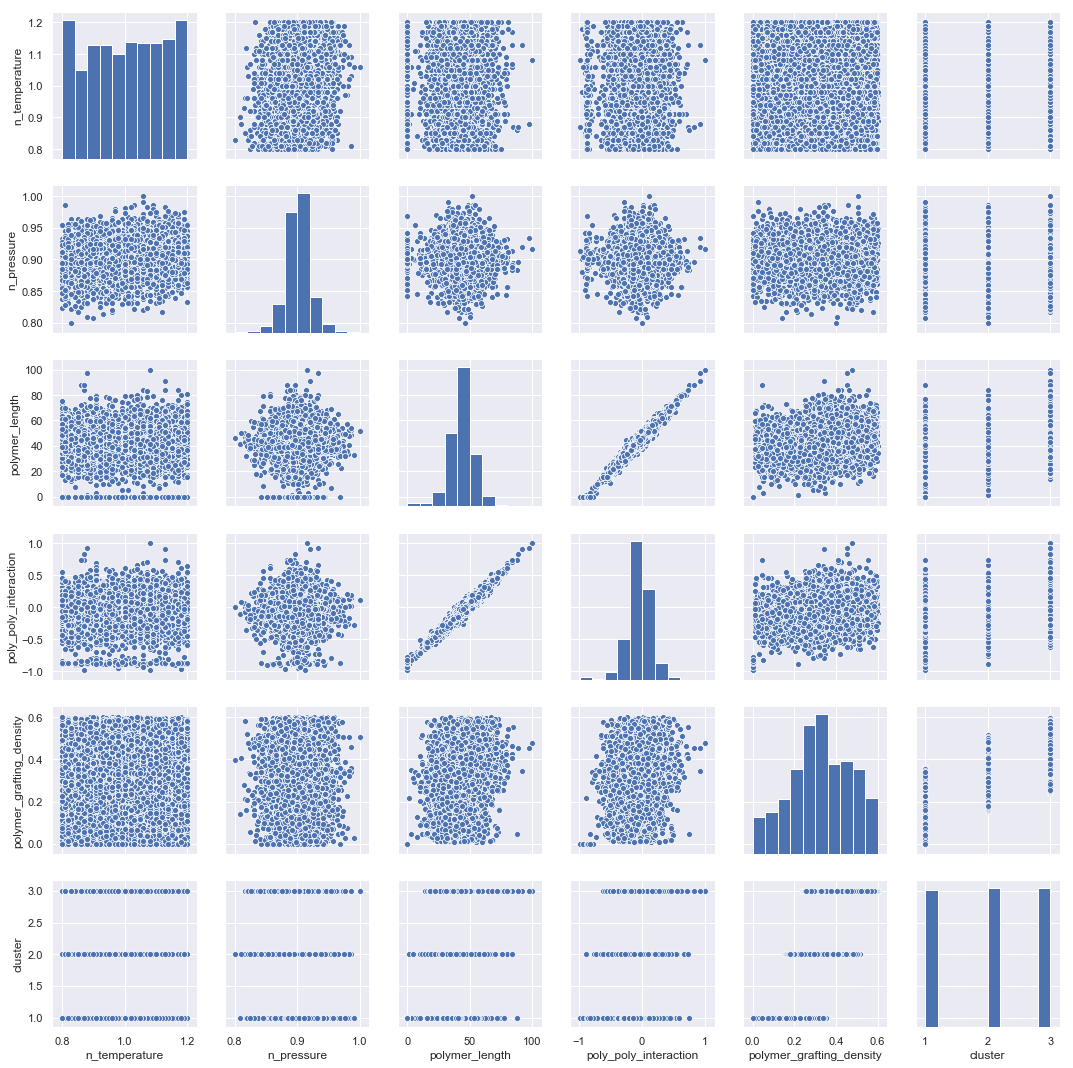

In [15]:
#scatterplot
sns.set()
cols = ['n_temperature','n_pressure','polymer_length','poly_poly_interaction','polymer_grafting_density','cluster']
sns.pairplot(data[cols])
plt.show();

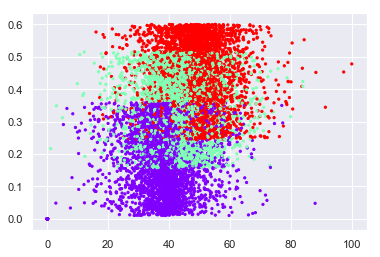

In [107]:
plt.scatter(data.iloc[:,10], data.iloc[:,13], c=data.iloc[:,14], s=5, cmap='rainbow')

In [117]:
min_max_scaler = MinMaxScaler()
data_km1 = pd.DataFrame(min_max_scaler.fit_transform(data[["polymer_length"]]))
data_km2 = pd.DataFrame(min_max_scaler.fit_transform(data[["polymer_grafting_density"]]))
data_km = pd.concat([data_km1, data_km2], axis=1)

kmeans = KMeans(n_clusters=3, random_state=0).fit_predict(data_km)
# with too many uncorrelated attributes can result in bad prediction of k-means

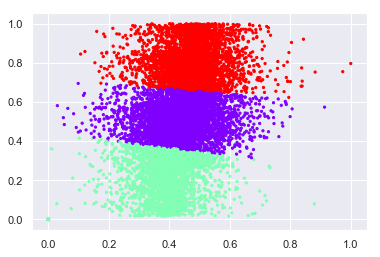

In [119]:
plt.scatter(data_km.iloc[:, 0], data_km.iloc[:, 1], c=kmeans, s=5, cmap='rainbow')

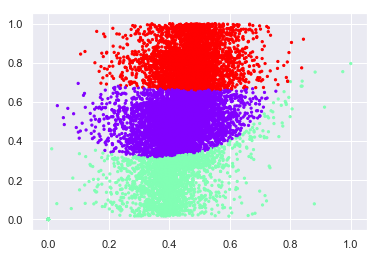

In [123]:
GM = GaussianMixture(n_components=3, covariance_type='full').fit_predict(data_km)
plt.scatter(data_km.iloc[:, 0], data_km.iloc[:, 1], c=GM, s=5, cmap='rainbow')

In [ ]:
# AP = AffinityPropagation(damping=0.5).fit_predict(data.iloc[:,[10,13]])
# plt.scatter(data.iloc[:, 10], data.iloc[:, 13], c=AP, s=5, cmap='rainbow')
# DO NOT RUN; TAKES 100X OF TIME

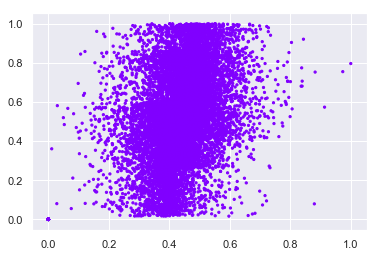

In [125]:
DB = DBSCAN().fit_predict(data_km)
plt.scatter(data_km.iloc[:, 0], data_km.iloc[:, 1], c=DB, s=5, cmap='rainbow')
# might not be suitable for our case

In [126]:
train_X=data.iloc[:,1:14]
train_Y=data.iloc[:,14]
test_X=test_data.iloc[:,1:14]
test_Y=test_data.iloc[:,14]

In [127]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
pred_tree=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(pred_tree,test_Y))

The accuracy of the Decision Tree is 0.6828333333333333


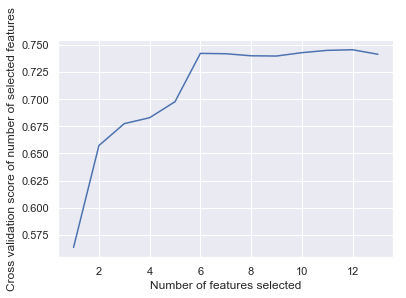

In [128]:
from sklearn.feature_selection import RFECV
import warnings
warnings.filterwarnings("ignore")

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf, step=1, cv=5, scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(train_X, train_Y)

# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Feature ranking:
1. feature 12 (0.302836)
2. feature 11 (0.127763)
3. feature 9 (0.126635)
4. feature 4 (0.085246)
5. feature 8 (0.064211)
6. feature 10 (0.052919)
7. feature 5 (0.050968)
8. feature 1 (0.049668)
9. feature 2 (0.047243)
10. feature 6 (0.044254)
11. feature 0 (0.039783)
12. feature 3 (0.006768)
13. feature 7 (0.001706)


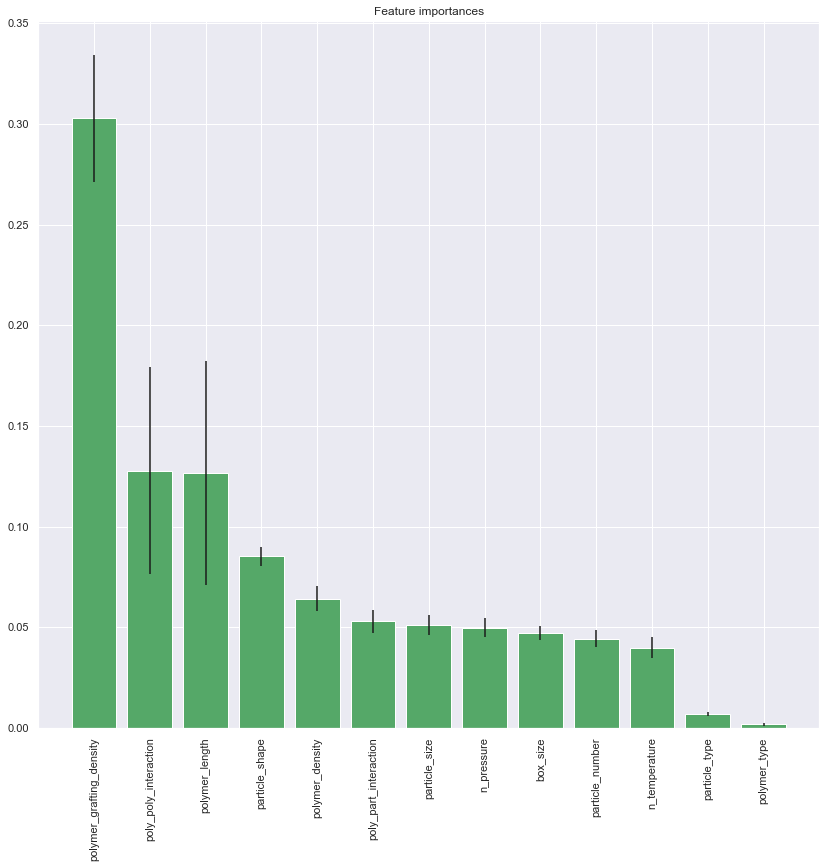

In [129]:
import warnings
warnings.filterwarnings("ignore")

clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(train_X, train_Y)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(train_X, train_Y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(train_X.shape[1]), train_X.columns[indices],rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.show()

In [130]:
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
pred_knn=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(pred_knn,test_Y))

The accuracy of the KNN is 0.358


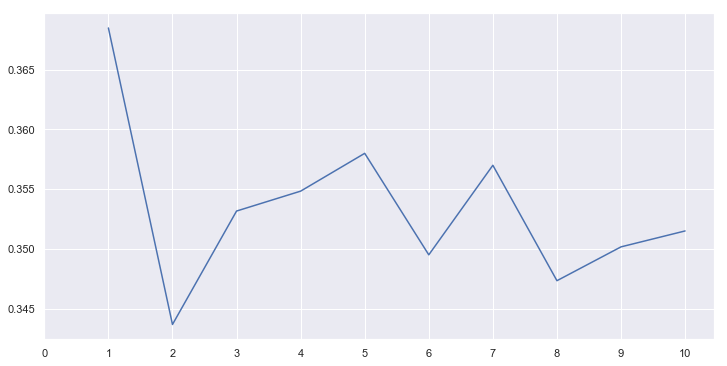

Accuracies for different values of n are: [0.3685     0.34366667 0.35316667 0.35483333 0.358      0.3495
 0.357      0.34733333 0.35016667 0.3515    ] with the max value as  0.3685


In [131]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [132]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
pred_rf=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(pred_rf,test_Y))

The accuracy of the Random Forests is 0.7565


Cross Validation: K-folds test

In [133]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=5, random_state=22) # k=5, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['KNN','Decision Tree','Random Forest']
models=[KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),RandomForestClassifier(n_estimators=100, random_state=29)]
for i in models:
    model = i
    cv_result = cross_val_score(model,train_X,train_Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'Cross Validation Mean':xyz,'Stdev':std},index=classifiers)       
new_models_dataframe2

,Cross Validation Mean,Stdev
KNN,0.346091,0.007342
Decision Tree,0.689000,0.005699
Random Forest,0.761221,0.006398


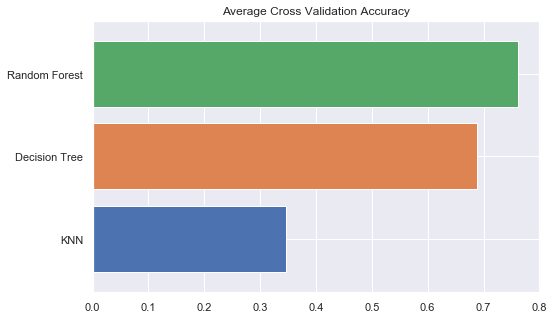

In [134]:
new_models_dataframe2['Cross Validation Mean'].plot.barh(width=0.8)
plt.title('Average Cross Validation Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

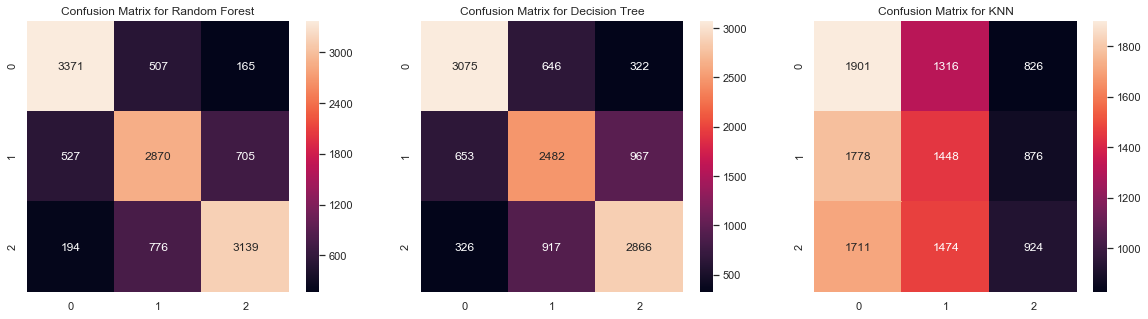

In [135]:
f,ax=plt.subplots(1,3,figsize=(20,5))

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100, random_state=29),train_X,train_Y,cv=5)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[0],annot=True,fmt='2.0f')
ax[0].set_title('Confusion Matrix for Random Forest')

y_pred = cross_val_predict(DecisionTreeClassifier(),train_X,train_Y,cv=5)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[1],annot=True,fmt='2.0f')
ax[1].set_title('Confusion Matrix for Decision Tree')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=5),train_X,train_Y,cv=5)
sns.heatmap(confusion_matrix(train_Y,y_pred),ax=ax[2],annot=True,fmt='2.0f')
ax[2].set_title('Confusion Matrix for KNN')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()

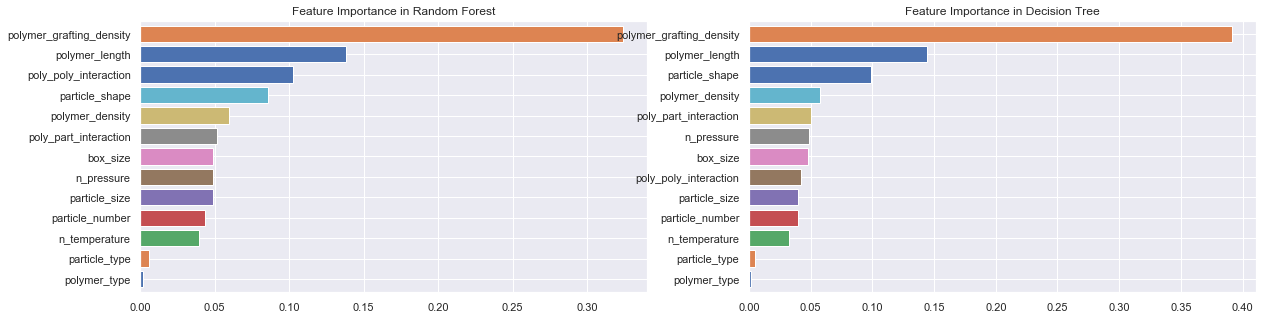

In [136]:
f,ax=plt.subplots(1,2,figsize=(20,5))
model=RandomForestClassifier(n_estimators=100,random_state=29)
model.fit(train_X,train_Y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0])
ax[0].set_title('Feature Importance in Random Forest')

model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
pd.Series(model.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1])
ax[1].set_title('Feature Importance in Decision Tree')

plt.show()

In [137]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(train_X.iloc[:,[9,12]])
y_kmeans = kmeans.predict(train_X.iloc[:,[9,12]])

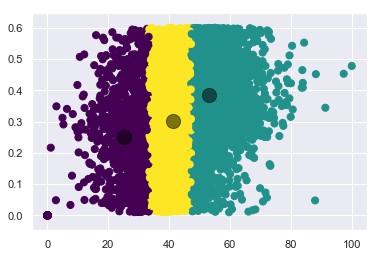

In [138]:
plt.scatter(train_X.iloc[:, 9], train_X.iloc[:, 12], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

n_neighbors = 3

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(train_X, train_Y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()

NameError: name 'X' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

X.info()
